In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.getcwd())  # Check where the script is running

df = pd.read_csv(r'/root/autodl-tmp/AAC concrete dataset large ratio.csv')
print("Dataset head:")
print(df.head())


/root/autodl-tmp
Dataset head:
  Idx_Sample Ref. Mixture Code in Ref   SiO2  Al2O3  Fe2O3   CaO   MgO  Na2O  \
0          1  [2]                FA-I  53.36  26.49  10.86  1.34  0.77  0.37   
1          2  [2]                FA-I  53.36  26.49  10.86  1.34  0.77  0.37   
2          3  [2]                FA-I  53.36  26.49  10.86  1.34  0.77  0.37   
3          4  [2]                FA-I  53.36  26.49  10.86  1.34  0.77  0.37   
4          5  [2]                FA-I  53.36  26.49  10.86  1.34  0.77  0.37   

   K2O  ...  14-d Cylindrical compressive strength (MPa)  \
0  0.8  ...                                          NaN   
1  0.8  ...                                          NaN   
2  0.8  ...                                          NaN   
3  0.8  ...                                          NaN   
4  0.8  ...                                          NaN   

   21-d Cylindrical compressive strength (MPa)  \
0                                          NaN   
1                          


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 76 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Idx_Sample                                                                             1630 non-null   object 
 1   Ref.                                                                                   1630 non-null   object 
 2   Mixture Code in Ref                                                                    1534 non-null   object 
 3   SiO2                                                                                   1630 non-null   float64
 4   Al2O3                                                                                  1630 non-null   float64
 5   Fe2O3                                                        

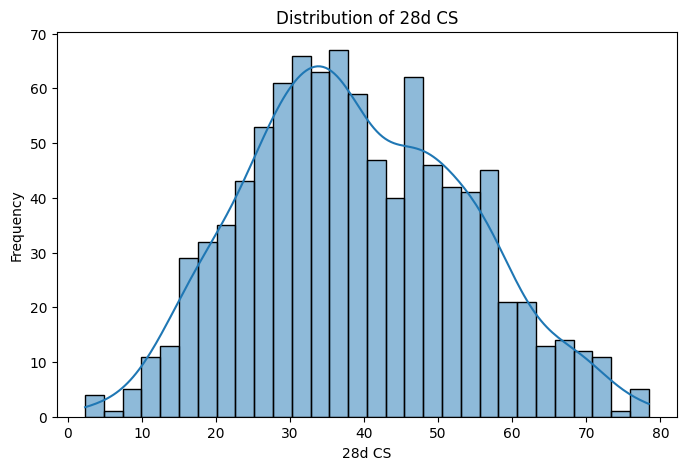

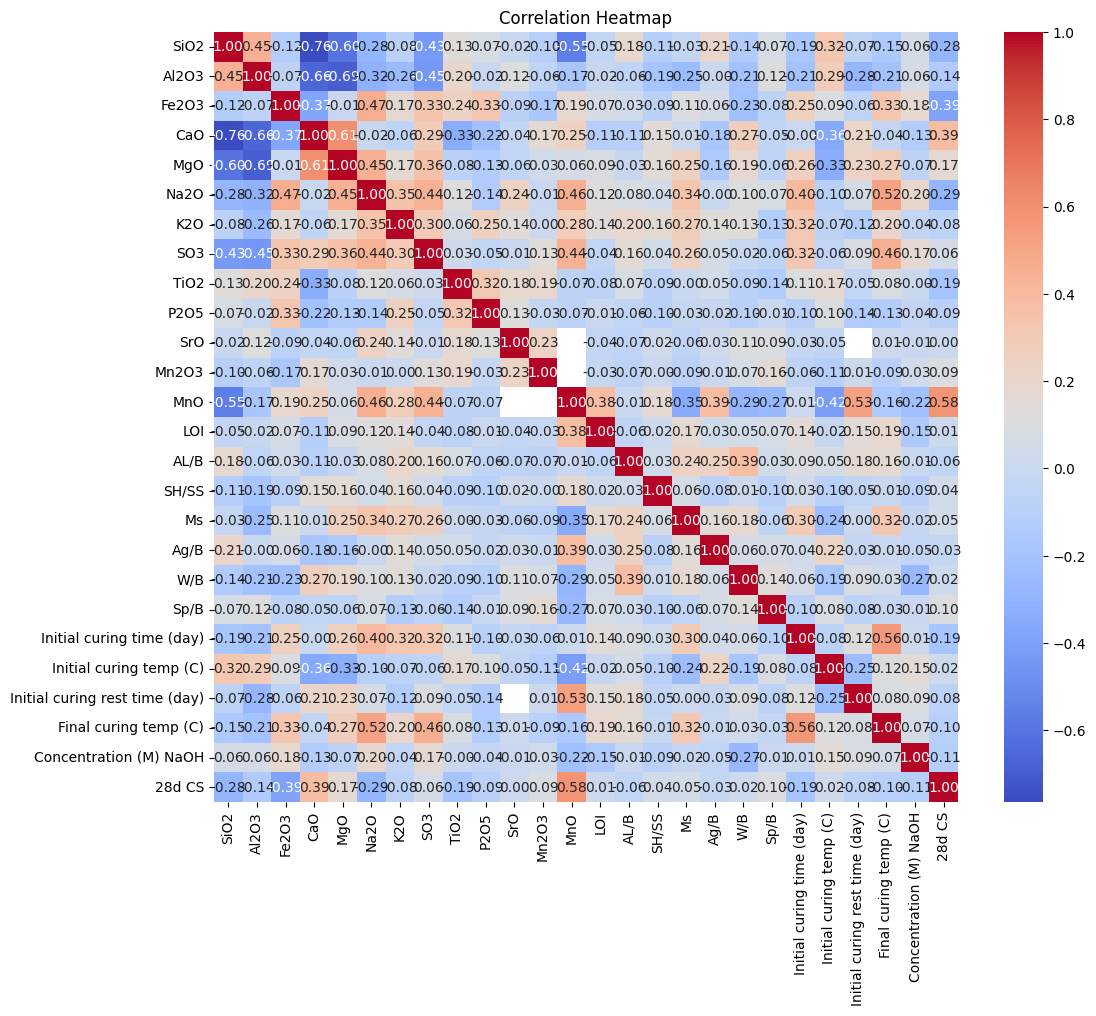

Removed outliers outside [7.26, 71.10]. New dataset size: (944, 76)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assuming df is already defined and imported ---

# Overview of the data
print("\nDataset Info:")
print(df.info())

# Count missing values in each column
print("\nMissing values:")
print(df.isnull().sum())

# Replace empty strings in the target with NaN and convert to numeric
target_col = "28d CS"
df[target_col] = pd.to_numeric(df[target_col].replace(' ', np.nan), errors='coerce')

# Plot target distribution (only valid numerical values)
plt.figure(figsize=(8, 5))
sns.histplot(df[target_col].dropna(), kde=True, bins=30)
plt.title('Distribution of 28d CS')
plt.xlabel('28d CS')
plt.ylabel('Frequency')
plt.show()

# Define feature columns
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "MnO", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing time (day)", "Initial curing temp (C)", 
    "Initial curing rest time (day)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Correlation heatmap between features and target
plt.figure(figsize=(12, 10))
sns.heatmap(df[feature_cols + [target_col]].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Remove outliers from target using IQR method (multiplier = 1)
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

df_clean = df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]
print(f"Removed outliers outside [{lower_bound:.2f}, {upper_bound:.2f}]. New dataset size: {df_clean.shape}")


In [11]:
# List of feature columns (ensure this matches your actual feature columns)
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "MnO", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing time (day)", "Initial curing temp (C)", 
    "Initial curing rest time (day)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Print the count of NaN values for each feature column
print("NaN count for each feature column:")
for col in feature_cols:
    nan_count = df_clean[col].isna().sum()
    print(f"{col}: {nan_count}")


NaN count for each feature column:
SiO2: 0
Al2O3: 0
Fe2O3: 0
CaO: 0
MgO: 0
Na2O: 1
K2O: 0
SO3: 0
TiO2: 0
P2O5: 0
SrO: 0
Mn2O3: 0
MnO: 832
LOI: 0
AL/B: 0
SH/SS: 0
Ms: 0
Ag/B: 0
W/B: 0
Sp/B: 0
Initial curing time (day): 457
Initial curing temp (C): 0
Initial curing rest time (day): 516
Final curing temp (C): 0
Concentration (M) NaOH: 9


In [12]:
# Drop the unwanted columns
cols_to_drop = ["MnO", "Initial curing time (day)", "Initial curing rest time (day)"]
df_cleaned = df_clean.drop(columns=cols_to_drop)

# Fill missing values in "Na2O" with the median value
median_Na2O = df_cleaned["Na2O"].median()
df_cleaned["Na2O"] = df_cleaned["Na2O"].fillna(median_Na2O)

# Fill missing values in "Initial curing temp (C)" with its median value
median_initial_curing_temp = df_cleaned["Initial curing temp (C)"].median()
df_cleaned["Initial curing temp (C)"] = df_cleaned["Initial curing temp (C)"].fillna(median_initial_curing_temp)

# Fill missing values in "K2O" with its median value
median_K2O = df_cleaned["K2O"].median()
df_cleaned["K2O"] = df_cleaned["K2O"].fillna(median_K2O)

# Drop rows with missing values in "Concentration (M) NaOH"
df_cleaned = df_cleaned.dropna(subset=["Concentration (M) NaOH"])

# Print the info to verify changes
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 76 to 1629
Data columns (total 73 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Idx_Sample                                                                             935 non-null    object 
 1   Ref.                                                                                   935 non-null    object 
 2   Mixture Code in Ref                                                                    884 non-null    object 
 3   SiO2                                                                                   935 non-null    float64
 4   Al2O3                                                                                  935 non-null    float64
 5   Fe2O3                                                                            

In [13]:
# Updated feature columns list after cleaning
feature_cols_clean = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Now, splitting into features (X) and target (y)
X = df_cleaned[feature_cols_clean].values
y = df_cleaned[target_col].values.reshape(-1, 1)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (935, 22)
y shape: (935, 1)


In [14]:
# Split data 80/20 into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train).ravel()  # ravel for 1d array
y_test_scaled = scaler_y.transform(y_test).ravel()

# Convert data to torch tensors for GPyTorch
import torch
train_x_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
train_y_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
test_x_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
test_y_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)


In [15]:
import gpytorch


class GPRegressionModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        # RBF kernel inside a ScaleKernel to learn output scale
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
    
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)


In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
r2_scores = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

print("\nStarting 10-fold Cross Validation...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled), 1):
    # Create fold-specific training and validation sets
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train_scaled[train_index], y_train_scaled[val_index]
    
    # Create tensors for training and validation data
    train_data = torch.tensor(X_cv_train, dtype=torch.float32)
    y_cv_train_tensor = torch.tensor(y_cv_train, dtype=torch.float32)
    X_cv_val_tensor = torch.tensor(X_cv_val, dtype=torch.float32)
    y_cv_val_tensor = torch.tensor(y_cv_val, dtype=torch.float32)
    
    # Define likelihood and model for this fold using the stored training data
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = GPRegressionModel(train_data, y_cv_train_tensor, likelihood)
    
    # Set model to training mode
    model.train()
    likelihood.train()
    
    # Use Adam optimizer and define the marginal log likelihood
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    
    training_iter = 300  # adjust iterations as needed
    for i in range(training_iter):
        optimizer.zero_grad()
        # Temporarily disable debug to avoid input identity check issues.
        with gpytorch.settings.debug(False):
            output = model(*model.train_inputs)
        loss = -mll(output, y_cv_train_tensor)
        loss.backward()
        optimizer.step()
    
    # Switch to evaluation mode for predictions on the validation set
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        preds = model(X_cv_val_tensor)
        mean_preds = preds.mean.numpy()
    
    # Calculate R2 score for this fold (using scaled targets)
    fold_r2 = r2_score(y_cv_val, mean_preds)
    r2_scores.append(fold_r2)
    print(f"Fold {fold}: R2 Score = {fold_r2:.3f}")

print(f"\nAverage 10-Fold CV R2 Score: {np.mean(r2_scores):.3f}")


Using device: cuda

Starting 10-fold Cross Validation...
Fold 1: R2 Score = 0.829
Fold 2: R2 Score = 0.791
Fold 3: R2 Score = 0.833
Fold 4: R2 Score = 0.790
Fold 5: R2 Score = 0.791
Fold 6: R2 Score = 0.760
Fold 7: R2 Score = 0.772
Fold 8: R2 Score = 0.801
Fold 9: R2 Score = 0.732
Fold 10: R2 Score = 0.839

Average 10-Fold CV R2 Score: 0.794


In [17]:
# Final evaluation on the test set
# Train the model on the full training set
likelihood = gpytorch.likelihoods.GaussianLikelihood()
final_model = GPRegressionModel(train_x_tensor, train_y_tensor, likelihood)

final_model.train()
likelihood.train()
optimizer = torch.optim.Adam(final_model.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, final_model)

training_iter = 400
for i in range(training_iter):
    optimizer.zero_grad()
    output = final_model(train_x_tensor)
    loss = -mll(output, train_y_tensor)
    loss.backward()
    optimizer.step()

# Set the model to evaluation mode and make predictions on the test set
final_model.eval()
likelihood.eval()
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    preds_test = final_model(test_x_tensor)
    mean_preds_test = preds_test.mean.numpy()

# Inverse-transform predictions and true values to original scale
mean_preds_test_orig = scaler_y.inverse_transform(mean_preds_test.reshape(-1, 1)).ravel()
y_test_orig = scaler_y.inverse_transform(test_y_tensor.numpy().reshape(-1, 1)).ravel()
test_r2 = r2_score(y_test_orig, mean_preds_test_orig)
print(f"\nTest R2 Score (original scale): {test_r2:.3f}")



Test R2 Score (original scale): 0.784


In [21]:
import torch
import gpytorch
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import itertools

# -------------------------------
# Data Preparation
# -------------------------------
# Assume X and y are already defined as your dataset's features and target.
# Here, we split the dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # 1D array
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# -------------------------------
# Set up device (GPU if available)
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------------
# Define the GP Regression Model (Basic RBF Kernel)
# -------------------------------
class GPRegressionModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        # RBF kernel inside a ScaleKernel to learn the output scale
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
    
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# -------------------------------
# Helper Function: 10-Fold Cross Validation Score
# -------------------------------
def cv_score(lr, training_iter):
    scores = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for train_index, val_index in kf.split(X_train_scaled):
        # Split data for current fold
        X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_cv_train, y_cv_val = y_train_scaled[train_index], y_train_scaled[val_index]
        
        # Convert to torch tensors and move to device
        train_data = torch.tensor(X_cv_train, dtype=torch.float32).to(device)
        y_train_tensor = torch.tensor(y_cv_train, dtype=torch.float32).to(device)
        val_data = torch.tensor(X_cv_val, dtype=torch.float32).to(device)
        
        likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)
        model = GPRegressionModel(train_data, y_train_tensor, likelihood).to(device)
        
        model.train()
        likelihood.train()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
        
        for i in range(training_iter):
            optimizer.zero_grad()
            output = model(*model.train_inputs)
            loss = -mll(output, y_train_tensor)
            loss.backward()
            optimizer.step()
        
        model.eval()
        likelihood.eval()
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            preds = model(val_data)
            mean_preds = preds.mean.cpu().numpy()
        fold_r2 = r2_score(y_cv_val, mean_preds)
        scores.append(fold_r2)
    return np.mean(scores)

# -------------------------------
# Hyperparameter Tuning via Grid Search (on GPU)
# -------------------------------
lr_values = [0.001, 0.01, 0.1, 1]
training_iters = [100, 300, 400, 500, 600]
best_score = -np.inf
best_params = None

print("\nStarting grid search for hyperparameters (using GPU)...")
for lr, iter_val in itertools.product(lr_values, training_iters):
    score = cv_score(lr, iter_val)
    print(f"lr: {lr}, training_iter: {iter_val}, CV R2: {score:.3f}")
    if score > best_score:
        best_score = score
        best_params = (lr, iter_val)

print(f"\nBest hyperparameters: lr = {best_params[0]}, training_iter = {best_params[1]} with CV R2 = {best_score:.3f}")

# -------------------------------
# Final Training on Full Training Data & Test Evaluation
# -------------------------------
# Convert full training and test data to torch tensors and move to device
train_x_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
train_y_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).to(device)
test_x_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
test_y_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).to(device)

likelihood_final = gpytorch.likelihoods.GaussianLikelihood().to(device)
final_model = GPRegressionModel(train_x_tensor, train_y_tensor, likelihood_final).to(device)

final_model.train()
likelihood_final.train()
optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params[0])
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood_final, final_model)

training_iter = best_params[1]
for i in range(training_iter):
    optimizer.zero_grad()
    output = final_model(train_x_tensor)
    loss = -mll(output, train_y_tensor)
    loss.backward()
    optimizer.step()
    if (i+1) % 50 == 0 or i == 0:
        print(f"[Final Model] Iter {i+1}/{training_iter} - Loss: {loss.item():.3f}")

final_model.eval()
likelihood_final.eval()
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_preds = final_model(test_x_tensor)
    mean_test_preds = test_preds.mean.cpu().numpy()

# Inverse-transform predictions and true test targets to original scale
mean_test_preds_orig = scaler_y.inverse_transform(mean_test_preds.reshape(-1, 1)).ravel()
y_test_orig = scaler_y.inverse_transform(test_y_tensor.cpu().numpy().reshape(-1, 1)).ravel()

test_r2 = r2_score(y_test_orig, mean_test_preds_orig)
print(f"\nTest R2 Score (original scale): {test_r2:.3f}")

Using device: cuda

Starting grid search for hyperparameters (using GPU)...
lr: 0.001, training_iter: 100, CV R2: 0.613
lr: 0.001, training_iter: 300, CV R2: 0.644
lr: 0.001, training_iter: 400, CV R2: 0.659
lr: 0.001, training_iter: 500, CV R2: 0.674
lr: 0.001, training_iter: 600, CV R2: 0.689
lr: 0.01, training_iter: 100, CV R2: 0.740
lr: 0.01, training_iter: 300, CV R2: 0.794
lr: 0.01, training_iter: 400, CV R2: 0.794
lr: 0.01, training_iter: 500, CV R2: 0.794
lr: 0.01, training_iter: 600, CV R2: 0.794
lr: 0.1, training_iter: 100, CV R2: 0.794
lr: 0.1, training_iter: 300, CV R2: 0.794
lr: 0.1, training_iter: 400, CV R2: 0.794
lr: 0.1, training_iter: 500, CV R2: 0.794
lr: 0.1, training_iter: 600, CV R2: 0.794
lr: 1, training_iter: 100, CV R2: 0.794
lr: 1, training_iter: 300, CV R2: 0.794
lr: 1, training_iter: 400, CV R2: 0.794
lr: 1, training_iter: 500, CV R2: 0.794
lr: 1, training_iter: 600, CV R2: 0.794

Best hyperparameters: lr = 0.01, training_iter = 400 with CV R2 = 0.794
[Final

In [43]:
# -------------------------------
# Uncertainty Extraction and Visualization
# -------------------------------
import matplotlib.pyplot as plt

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    # Get the predictive distribution on the test set
    test_preds = final_model(test_x_tensor)
    
    # Extract mean predictions and predictive variance
    mean_test_preds = test_preds.mean.cpu().numpy()
    var_test_preds = test_preds.variance.cpu().numpy()
    
    # Compute standard deviation (uncertainty)
    std_test_preds = np.sqrt(var_test_preds)

# Inverse-transform the mean predictions back to the original scale
mean_test_preds_orig = scaler_y.inverse_transform(mean_test_preds.reshape(-1, 1)).ravel()

# The StandardScaler scales the data as: y_scaled = (y - mean) / std,
# so to convert standard deviations back, multiply by the original target standard deviation.
# Here we assume scaler_y.scale_ is an array and use its first element.
std_test_preds_orig = std_test_preds * scaler_y.scale_[0]

# Print a few predictions with their uncertainties
for i in range(20):
    print(f"Test sample {i}: Predicted value = {mean_test_preds_orig[i]:.3f}, Uncertainty (std) = {std_test_preds_orig[i]:.3f}")

# Calculate the average uncertainty (standard deviation) across all test samples
avg_uncertainty = np.mean(std_test_preds_orig)
print(f"Average uncertainty (std): {avg_uncertainty:.3f}")




Test sample 0: Predicted value = 37.394, Uncertainty (std) = 5.201
Test sample 1: Predicted value = 29.339, Uncertainty (std) = 15.029
Test sample 2: Predicted value = 45.994, Uncertainty (std) = 6.527
Test sample 3: Predicted value = 46.519, Uncertainty (std) = 3.939
Test sample 4: Predicted value = 48.272, Uncertainty (std) = 1.323
Test sample 5: Predicted value = 41.329, Uncertainty (std) = 3.041
Test sample 6: Predicted value = 38.276, Uncertainty (std) = 3.081
Test sample 7: Predicted value = 44.002, Uncertainty (std) = 5.083
Test sample 8: Predicted value = 32.812, Uncertainty (std) = 6.684
Test sample 9: Predicted value = 40.077, Uncertainty (std) = 5.279
Test sample 10: Predicted value = 17.275, Uncertainty (std) = 7.948
Test sample 11: Predicted value = 29.823, Uncertainty (std) = 2.572
Test sample 12: Predicted value = 14.620, Uncertainty (std) = 3.513
Test sample 13: Predicted value = 36.208, Uncertainty (std) = 3.526
Test sample 14: Predicted value = 50.600, Uncertainty (st

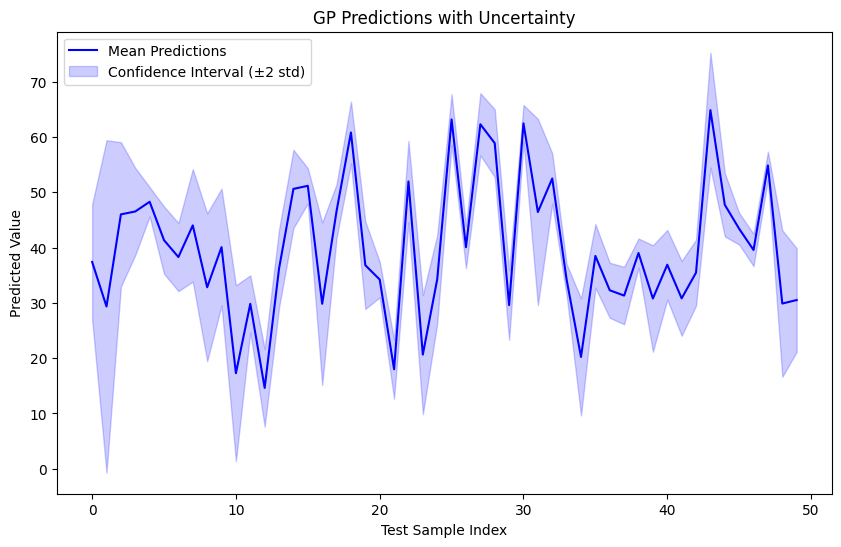

In [41]:
indices = np.arange(50)
plt.figure(figsize=(10, 6))
plt.plot(indices, mean_test_preds_orig[:50], 'b-', label='Mean Predictions')
plt.fill_between(indices,
                 mean_test_preds_orig[:50] - 2 * std_test_preds_orig[:50],
                 mean_test_preds_orig[:50] + 2 * std_test_preds_orig[:50],
                 color='b', alpha=0.2, label='Confidence Interval (±2 std)')
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted Value")
plt.legend()
plt.title("GP Predictions with Uncertainty")
plt.show()

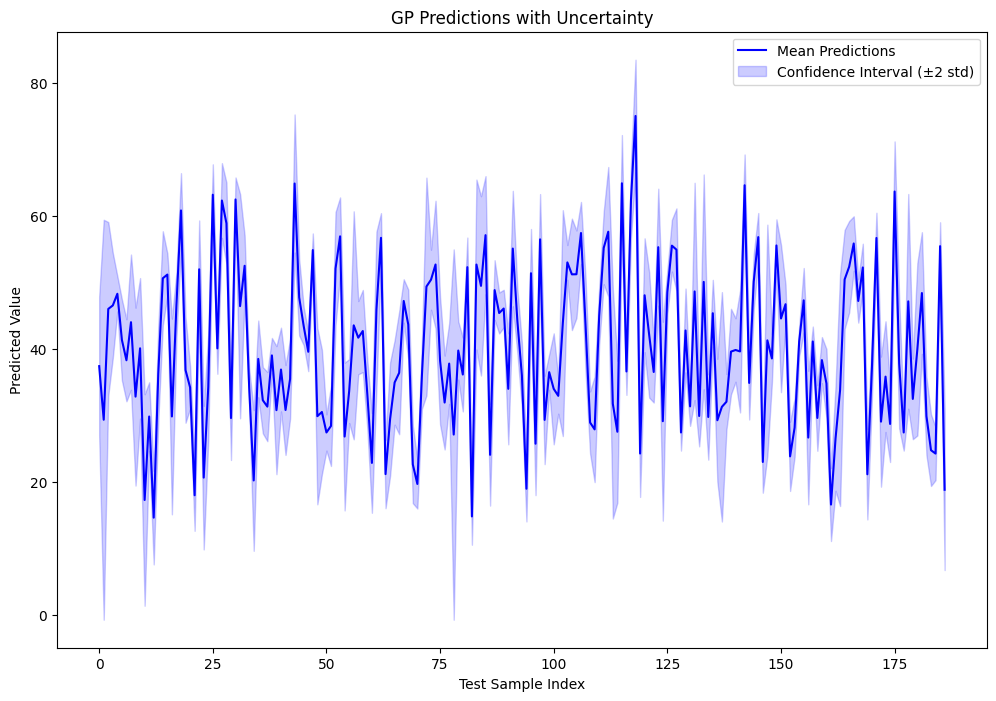

In [42]:
# Create indices for all test samples
indices = np.arange(len(mean_test_preds_orig))

plt.figure(figsize=(12, 8))
plt.plot(indices, mean_test_preds_orig, 'b-', label='Mean Predictions')
plt.fill_between(indices,
                 mean_test_preds_orig - 2 * std_test_preds_orig,
                 mean_test_preds_orig + 2 * std_test_preds_orig,
                 color='b', alpha=0.2, label='Confidence Interval (±2 std)')
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted Value")
plt.legend()
plt.title("GP Predictions with Uncertainty")
plt.show()



Permutation Importances (Drop in R2):
SiO2: 0.3177
Al2O3: 0.1503
Fe2O3: 0.1705
CaO: 0.1642
MgO: 0.0938
Na2O: 0.0516
K2O: 0.0680
SO3: 0.0609
TiO2: 0.0737
P2O5: 0.1249
SrO: 0.0650
Mn2O3: 0.0389
LOI: 0.0376
AL/B: 0.1378
SH/SS: 0.0297
Ms: 0.1131
Ag/B: 0.0714
W/B: 0.1266
Sp/B: 0.0151
Initial curing temp (C): 0.1942
Final curing temp (C): 0.0477
Concentration (M) NaOH: 0.1513


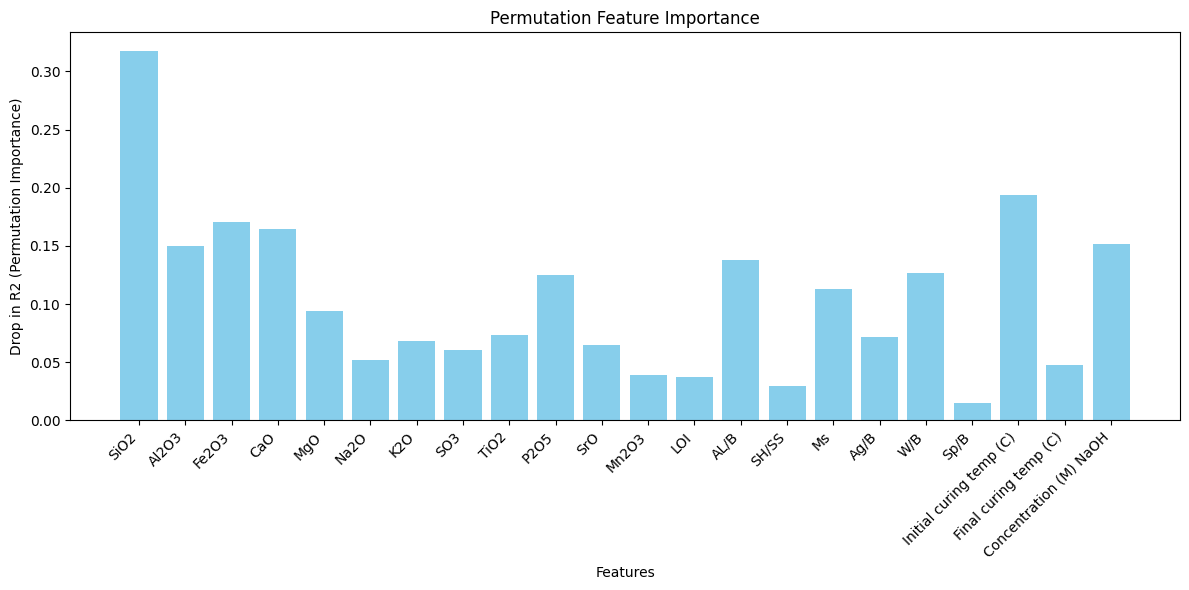

In [24]:
# -------------------------------
# Permutation Feature Importance
# -------------------------------
# Calculate baseline performance on the test set
baseline_r2 = test_r2
importances = {}
feature_cols_clean = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Create a copy of test features to modify
X_test_permuted = X_test_scaled.copy()

# Loop over each feature, permuting its values and computing the drop in R2
for col in range(X_test_scaled.shape[1]):
    # Permute this column
    X_test_permuted[:, col] = np.random.permutation(X_test_permuted[:, col])
    # Convert to tensor and evaluate
    test_tensor = torch.tensor(X_test_permuted, dtype=torch.float32).to(device)
    
    final_model.eval()
    likelihood_final.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        preds_permuted = final_model(test_tensor)
        mean_preds_permuted = preds_permuted.mean.cpu().numpy()
    mean_preds_permuted_orig = scaler_y.inverse_transform(mean_preds_permuted.reshape(-1, 1)).ravel()
    permuted_r2 = r2_score(y_test_orig, mean_preds_permuted_orig)
    
    # Importance is measured as drop in R2
    importances[col] = baseline_r2 - permuted_r2
    
    # Reset the column back to its original values for the next iteration
    X_test_permuted[:, col] = X_test_scaled[:, col]

# Print permutation importances with feature names
print("\nPermutation Importances (Drop in R2):")
for i, imp in importances.items():
    print(f"{feature_cols_clean[i]}: {imp:.4f}")

# Optionally, plot the permutation importances
features = [feature_cols_clean[i] for i in range(len(feature_cols_clean))]
importance_values = [importances[i] for i in range(len(feature_cols_clean))]

plt.figure(figsize=(12, 6))
plt.bar(features, importance_values, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Drop in R2 (Permutation Importance)")
plt.title("Permutation Feature Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [107]:
!pip install shap

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 16.1 MB/s eta 0:00:0000:0100:01


/root/miniconda3/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:296: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
Using 748 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/187 [00:00<?, ?it/s]

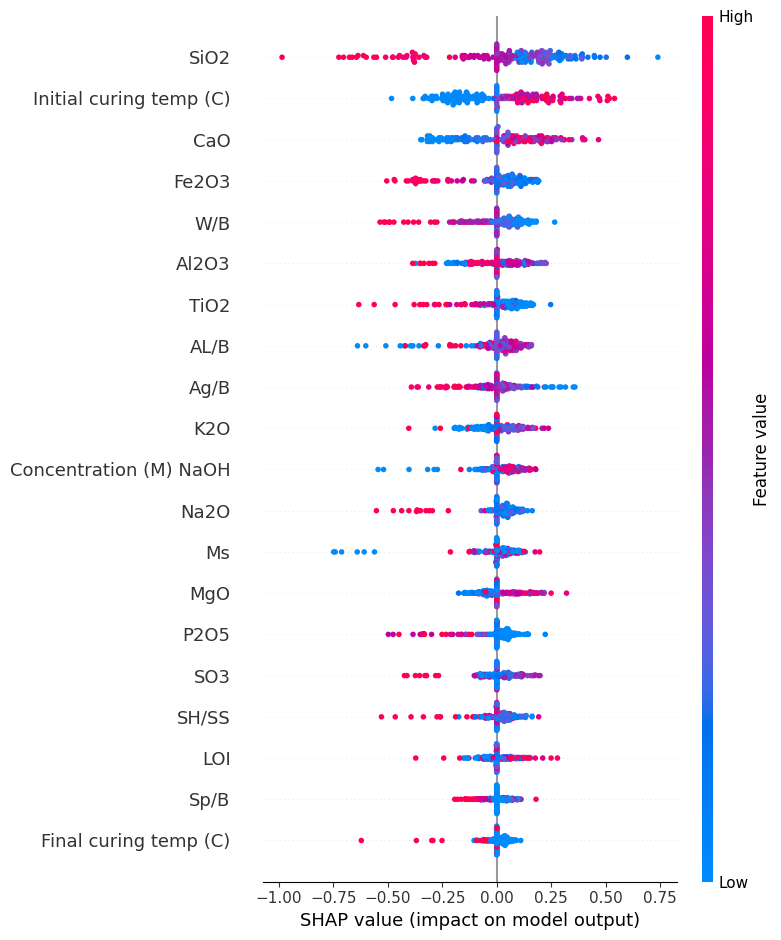

In [33]:
import shap

# Define a prediction function that uses your trained final GP model
def gp_model_predict(X):
    # Convert the input numpy array to a torch tensor and move to the proper device
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    final_model.eval()
    likelihood_final.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        preds = final_model(X_tensor)
        # Return the mean predictions from the Gaussian Process model
        return preds.mean.cpu().numpy()

# Use the entire scaled training data as the background dataset.
background = X_train_scaled

# Create the SHAP KernelExplainer using your prediction function and the background dataset.
explainer = shap.KernelExplainer(gp_model_predict, background)

# Compute SHAP values for all samples from your test set.
# nsamples=100 controls the number of samples used for approximating the SHAP values.
shap_values = explainer.shap_values(X_test_scaled, nsamples=100)

# Feature names as stored in your cleaned feature columns list.
feature_cols_clean = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Visualize the SHAP values using a summary plot with your feature names.
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_cols_clean)


In [32]:
print(X_train.shape)

(748, 22)


In [ ]:
import torch
import gpytorch
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import gpytorch.settings as gpt_settings
import itertools

# -------------------------------
# Data Preparation
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # flatten to 1D
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# -------------------------------
# Set up device (GPU if available)
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------------
# Define the GP Regression Model with Spectral Mixture Kernel
# -------------------------------
class GPRegressionRBFModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionRBFModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel(ard_num_dims=train_x.shape[1])
        )
    
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Then use similar training and CV loops as before.


# -------------------------------
# 10-Fold Cross Validation with Spectral Mixture Kernel
# -------------------------------
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_r2_scores = []

print("\nStarting 10-fold Cross Validation with Spectral Mixture Kernel...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled), 1):
    # Split data for current fold
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train_scaled[train_index], y_train_scaled[val_index]
    
    # Convert data to torch tensors and move to device
    train_data = torch.tensor(X_cv_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_cv_train, dtype=torch.float32).to(device)
    val_data = torch.tensor(X_cv_val, dtype=torch.float32).to(device)
    
    likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)
    # Using Spectral Mixture kernel with num_mixtures=2 for stability
    model = GPRegressionSpectralMixtureModel(train_data, y_train_tensor, likelihood, num_mixtures=2).to(device)
    
    model.train()
    likelihood.train()
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Lower learning rate for stability
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    
    training_iter = 300
    for i in range(training_iter):
        optimizer.zero_grad()
        # Use explicit call with the training tensor and apply jitter
        with gpt_settings.debug(False), gpt_settings.cholesky_jitter(1e-3):
            output = model(train_data)
        loss = -mll(output, y_train_tensor)
        loss.backward()
        optimizer.step()
    
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        preds = model(val_data)
        mean_preds = preds.mean.cpu().numpy()
    
    fold_r2 = r2_score(y_cv_val, mean_preds)
    cv_r2_scores.append(fold_r2)
    print(f"Fold {fold}: R2 Score = {fold_r2:.3f}")

print(f"\nAverage 10-Fold CV R2 Score: {np.mean(cv_r2_scores):.3f}")

# -------------------------------
# Final Model Training on Full Training Data and Test Evaluation
# -------------------------------
train_x_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
train_y_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).to(device)
test_x_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
test_y_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).to(device)

likelihood_final = gpytorch.likelihoods.GaussianLikelihood().to(device)
final_model = GPRegressionSpectralMixtureModel(train_x_tensor, train_y_tensor, likelihood_final, num_mixtures=2).to(device)

final_model.train()
likelihood_final.train()

optimizer = torch.optim.Adam(final_model.parameters(), lr=0.001)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood_final, final_model)

training_iter = 300
for i in range(training_iter):
    optimizer.zero_grad()
    # Apply jitter during final training as well.
    with gpt_settings.debug(False), gpt_settings.cholesky_jitter(1e-3):
        output = final_model(train_x_tensor)
    loss = -mll(output, train_y_tensor)
    loss.backward()
    optimizer.step()
    if (i+1) % 50 == 0 or i == 0:
        print(f"[Final Model] Iter {i+1}/{training_iter} - Loss: {loss.item():.3f}")

# Print out learned kernel hyperparameters for diagnostic purposes
print("\nLearned Spectral Mixture Kernel Parameters:")
mixture_weights = final_model.covar_module.base_kernel.mixture_weights.detach().cpu().numpy()
mixture_means = final_model.covar_module.base_kernel.mixture_means.detach().cpu().numpy()
mixture_scales = final_model.covar_module.base_kernel.mixture_scales.detach().cpu().numpy()
print("Mixture Weights:", mixture_weights)
print("Mixture Means:", mixture_means)
print("Mixture Scales:", mixture_scales)

final_model.eval()
likelihood_final.eval()
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_preds = final_model(test_x_tensor)
    mean_test_preds = test_preds.mean.cpu().numpy()

# Inverse-transform predictions and test targets to original scale
mean_test_preds_orig = scaler_y.inverse_transform(mean_test_preds.reshape(-1, 1)).ravel()
y_test_orig = scaler_y.inverse_transform(test_y_tensor.cpu().numpy().reshape(-1, 1)).ravel()

test_r2 = r2_score(y_test_orig, mean_test_preds_orig)
print(f"\nTest R2 Score (original scale): {test_r2:.3f}")


In [50]:
def cv_score(lr, training_iter, jitter_val=1e-4):
    """
    Perform 10-fold cross validation using the given hyperparameters.
    
    Parameters:
        lr (float): Learning rate for the optimizer.
        training_iter (int): Number of training iterations per fold.
        jitter_val (float): Jitter value for numerical stability.
    
    Returns:
        float: Average CV R² score.
    """
    from sklearn.model_selection import KFold
    from sklearn.metrics import r2_score
    import torch
    import gpytorch
    import numpy as np
    
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = []
    
    for train_index, val_index in kf.split(X_train_scaled):
        # Create fold-specific training and validation sets
        X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_cv_train, y_cv_val = y_train_scaled[train_index], y_train_scaled[val_index]
    
        # Create tensors for training and validation data
        train_data = torch.tensor(X_cv_train, dtype=torch.float32)
        y_cv_train_tensor = torch.tensor(y_cv_train, dtype=torch.float32)
        X_cv_val_tensor = torch.tensor(X_cv_val, dtype=torch.float32)
    
        # Define likelihood and model for this fold using the stored training data
        likelihood = gpytorch.likelihoods.GaussianLikelihood()
        model = GPRegressionModel(train_data, y_cv_train_tensor, likelihood)
    
        # Optionally initialize hyperparameters (adjust as needed)
        model.covar_module.base_kernel.lengthscale = torch.tensor(1.0)
        likelihood.noise = torch.tensor(1e-2)
    
        # Set model to training mode
        model.train()
        likelihood.train()
    
        # Use Adam optimizer with provided learning rate
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    
        for i in range(training_iter):
            optimizer.zero_grad()
            with gpytorch.settings.debug(False), gpytorch.settings.cholesky_jitter(jitter_val):
                output = model(*model.train_inputs)
            loss = -mll(output, y_cv_train_tensor)
            loss.backward()
            optimizer.step()
    
        # Evaluation on validation set
        model.eval()
        likelihood.eval()
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            preds = model(X_cv_val_tensor)
            mean_preds = preds.mean.numpy()
    
        fold_r2 = r2_score(y_cv_val, mean_preds)
        cv_scores.append(fold_r2)
    
    return np.mean(cv_scores)


In [62]:
import numpy as np

learning_rates = [0.001, 0.005, 0.01, 0.05]
training_iters = [200, 300, 400]
best_score = -np.inf
best_params = None

for lr in learning_rates:
    for t_iter in training_iters:
        score = cv_score(lr, t_iter)
        print(f"LR: {lr}, Training Iterations: {t_iter}, CV R²: {score:.3f}")
        if score > best_score:
            best_score = score
            best_params = {'lr': lr, 'training_iter': t_iter}

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Average CV R²: {best_score:.3f}")


KeyboardInterrupt: 

In [54]:
print("Model is on device:", next(model.parameters()).device)

Model is on device: cpu


In [77]:
import torch
import gpytorch
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define the GP Regression Model with a Matern Kernel (nu=2.5)
class GPRegressionMaternModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionMaternModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        # Matern kernel with nu=2.5 wrapped in a ScaleKernel
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.MaternKernel(nu=2.5)
        )
    
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Example cross-validation using your scaled training data:
# (Ensure that X_train_scaled and y_train_scaled are defined as NumPy arrays.)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
r2_scores = []

print("\nStarting 10-fold Cross Validation...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled), 1):
    # Create fold-specific training and validation sets
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train_scaled[train_index], y_train_scaled[val_index]
    
    # Convert data to torch tensors and move them to the GPU
    train_data = torch.tensor(X_cv_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_cv_train, dtype=torch.float32).to(device)
    val_data = torch.tensor(X_cv_val, dtype=torch.float32).to(device)
    
    # Define likelihood and model for this fold, and move to GPU
    likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)
    model = GPRegressionMaternModel(train_data, y_train_tensor, likelihood).to(device)
    
    # Set model to training mode
    model.train()
    likelihood.train()
    
    # Use Adam optimizer and define the marginal log likelihood
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    
    training_iter = 500  # adjust iterations as needed
    for i in range(training_iter):
        optimizer.zero_grad()
        # Use the stored training inputs for consistency
        output = model(*model.train_inputs)
        loss = -mll(output, y_train_tensor)
        loss.backward()
        optimizer.step()
    
    # Switch to evaluation mode for predictions on the validation set
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        preds = model(val_data)
        mean_preds = preds.mean.cpu().numpy()  # move to CPU for r2_score
    
    fold_r2 = r2_score(y_cv_val, mean_preds)
    r2_scores.append(fold_r2)
    print(f"Fold {fold}: R2 Score = {fold_r2:.3f}")

print(f"\nAverage 10-Fold CV R2 Score: {np.mean(r2_scores):.3f}")


Using device: cuda

Starting 10-fold Cross Validation...
Fold 1: R2 Score = 0.770
Fold 2: R2 Score = 0.762
Fold 3: R2 Score = 0.817
Fold 4: R2 Score = 0.783
Fold 5: R2 Score = 0.890
Fold 6: R2 Score = 0.707
Fold 7: R2 Score = 0.797
Fold 8: R2 Score = 0.872
Fold 9: R2 Score = 0.758
Fold 10: R2 Score = 0.740

Average 10-Fold CV R2 Score: 0.790


In [83]:
import torch
import gpytorch
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Set the device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define the GP Regression Model with composite kernel:
# Composite kernel = (Constant * RBF) + (Constant * RationalQuadratic)
class GPRegressionCompositeRQModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionCompositeRQModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        # Define kernel components:
        # Component 1: Constant * RBF Kernel
        self.rbf_kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        # Component 2: Constant * RationalQuadratic Kernel
        self.rq_kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())
        # Composite kernel is the sum of the two components
        self.covar_module = self.rbf_kernel + self.rq_kernel

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# ----------------------
# 10-Fold Cross Validation
# ----------------------
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_r2_scores = []

print("\nStarting 10-fold Cross Validation...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled), 1):
    # Split the data
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train_scaled[train_index], y_train_scaled[val_index]

    # Convert to torch tensors and move to device
    train_data = torch.tensor(X_cv_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_cv_train, dtype=torch.float32).to(device)
    val_data = torch.tensor(X_cv_val, dtype=torch.float32).to(device)
    
    # Define likelihood and model, and move them to device
    likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)
    model = GPRegressionCompositeRQModel(train_data, y_train_tensor, likelihood).to(device)
    
    # Set to training mode
    model.train()
    likelihood.train()
    
    # Define optimizer and marginal log likelihood
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    
    training_iter = 300  # adjust iterations as needed
    for i in range(training_iter):
        optimizer.zero_grad()
        output = model(*model.train_inputs)
        loss = -mll(output, y_train_tensor)
        loss.backward()
        optimizer.step()
    
    # Switch to evaluation mode
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        preds = model(val_data)
        mean_preds = preds.mean.cpu().numpy()  # move predictions to CPU
    
    fold_r2 = r2_score(y_cv_val, mean_preds)
    cv_r2_scores.append(fold_r2)
    print(f"Fold {fold}: R2 Score = {fold_r2:.3f}")

print(f"\nAverage 10-Fold CV R2 Score: {np.mean(cv_r2_scores):.3f}")

# ----------------------
# Final Model Training on Full Training Data and Test Prediction
# ----------------------
# Convert full training data to torch tensors
train_data_full = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_full = torch.tensor(y_train_scaled, dtype=torch.float32).to(device)

# Define likelihood and final model, and move to device
likelihood_final = gpytorch.likelihoods.GaussianLikelihood().to(device)
final_model = GPRegressionCompositeRQModel(train_data_full, y_train_full, likelihood_final).to(device)

# Set to training mode
final_model.train()
likelihood_final.train()

# Define optimizer and MLL for the final model
optimizer = torch.optim.Adam(final_model.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood_final, final_model)

training_iter = 300  # adjust iterations as needed
for i in range(training_iter):
    optimizer.zero_grad()
    output = final_model(*final_model.train_inputs)
    loss = -mll(output, y_train_full)
    loss.backward()
    optimizer.step()
    if (i + 1) % 50 == 0 or i == 0:
        print(f"[Final Model] Iter {i+1}/{training_iter} - Loss: {loss.item():.3f}")

# Convert test data to torch tensor and move to device
test_data = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

# Predict on test data and compute R² score using ground truth labels y_test_scaled
final_model.eval()
likelihood_final.eval()
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_preds = final_model(test_data)
    mean_test_preds = test_preds.mean.cpu().numpy()

test_r2 = r2_score(y_test_scaled, mean_test_preds)
print(f"\nTest R² Score: {test_r2:.3f}")


Using device: cuda

Starting 10-fold Cross Validation...
Fold 1: R2 Score = 0.766
Fold 2: R2 Score = 0.760
Fold 3: R2 Score = 0.816
Fold 4: R2 Score = 0.780
Fold 5: R2 Score = 0.890
Fold 6: R2 Score = 0.705
Fold 7: R2 Score = 0.798
Fold 8: R2 Score = 0.866
Fold 9: R2 Score = 0.756
Fold 10: R2 Score = 0.740

Average 10-Fold CV R2 Score: 0.788
[Final Model] Iter 1/300 - Loss: 1.256
[Final Model] Iter 50/300 - Loss: 1.082
[Final Model] Iter 100/300 - Loss: 0.951
[Final Model] Iter 150/300 - Loss: 0.872
[Final Model] Iter 200/300 - Loss: 0.834
[Final Model] Iter 250/300 - Loss: 0.819
[Final Model] Iter 300/300 - Loss: 0.814

Test R² Score: 0.780
